# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Zidane Bachtiar
- Email: zidanebachtiar13@gmail.com
- Id Dicoding: zidanebachtiar13

## Menentukan Pertanyaan Bisnis

- Pada musim apa customer terbanyak melakukan rental sepeda?
- Bagaimana performa peminjaman sepeda pada masing-masing bulan?
- Pada jam berapa biasanya rental dijadikan pilihan customer?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv('data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
print('Jumlah missing value pada data day:', day.isna().sum().sum())
print('Jumlah duplicated pada data day:', day.duplicated().sum())

Jumlah missing value pada data day: 0
Jumlah duplicated pada data day: 0


In [5]:
print('Jumlah missing value pada data hour:', hour.isna().sum().sum())
print('Jumlah duplicated pada data hour:', hour.duplicated().sum())

Jumlah missing value pada data hour: 0
Jumlah duplicated pada data hour: 0


## Exploratory Data Analysis (EDA)

### Explore Data Day

In [6]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore Data Hour

In [7]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa customer terbanyak melakukan rental sepeda?

Sesuai dengan data yang tertera musim terdapat di data season, musim yang terdapat ada 4 yaitu: 
1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin.

In [8]:
day[['season','cnt']].groupby(by='season').sum().reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


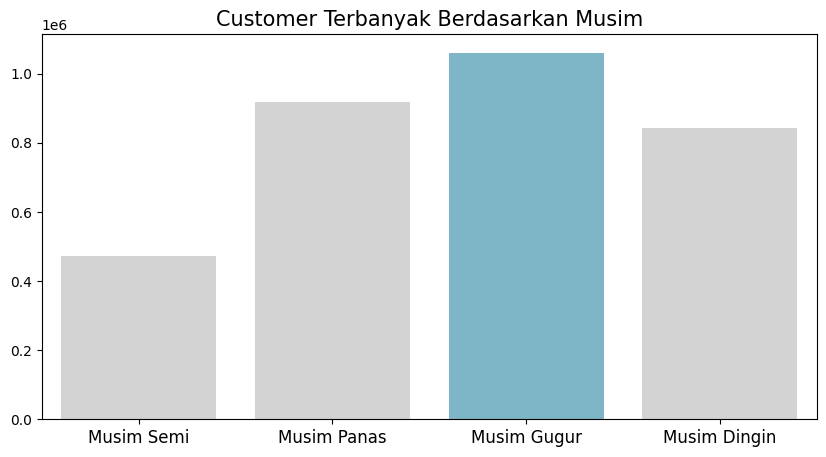

In [9]:
musim_terbanyak = day[['season','cnt']].groupby(by='season').sum().reset_index()

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
musim = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']

plt.figure(figsize=(10, 5))
 
sns.barplot(
    x="season", 
    y="cnt",
    data=musim_terbanyak,
    palette=colors
)
plt.title("Customer Terbanyak Berdasarkan Musim", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([0,1,2,3], musim)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana performa peminjaman sepeda pada masing-masing bulan?

In [10]:
day[['mnth','cnt']].groupby(by='mnth').sum().reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


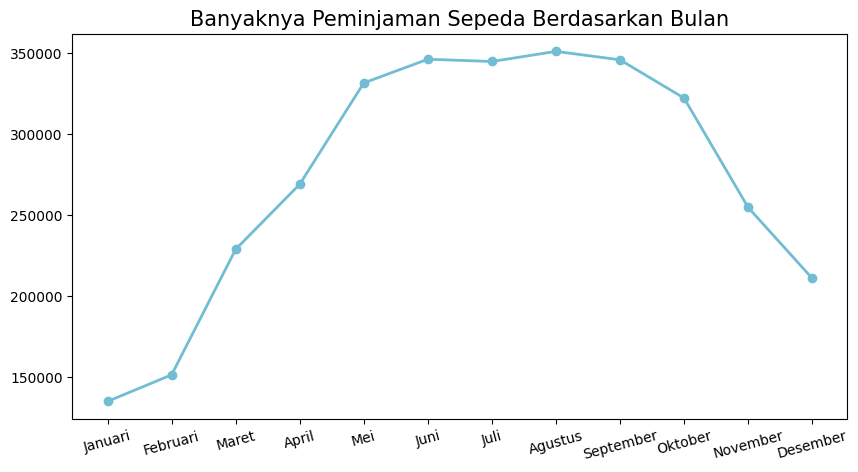

In [23]:
bulan_terbanyak = day[['mnth','cnt']].groupby(by='mnth').sum().reset_index()

bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

plt.figure(figsize=(10, 5))
 
plt.plot(bulan_terbanyak['mnth'], bulan_terbanyak['cnt'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Banyaknya Peminjaman Sepeda Berdasarkan Bulan", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(1, 13), bulan, rotation=15)
plt.show()

### Pertanyaan 3: Pada jam berapa biasanya rental dijadikan pilihan customer?

In [22]:
hour[['hr', 'cnt']].groupby(by='hr').sum().reset_index()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


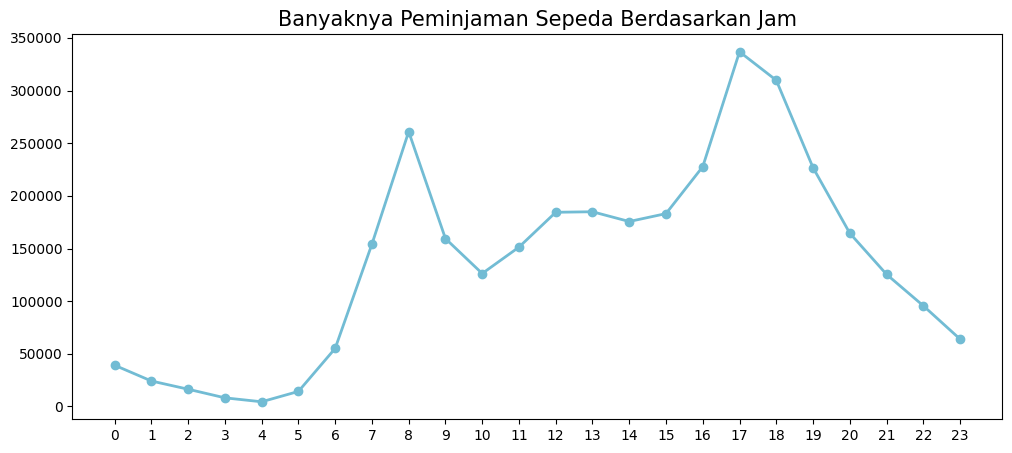

In [30]:
jam_terbanyak = hour[['hr', 'cnt']].groupby(by='hr').sum().reset_index()

plt.figure(figsize=(12, 5))
 
plt.plot(jam_terbanyak['hr'], jam_terbanyak['cnt'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Banyaknya Peminjaman Sepeda Berdasarkan Jam", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(0, 24))
plt.show()

## Conclusion

- Pada diagram diatas bisa dilihat bahwa customer lebih banyak memilih musim gugur untuk melakukan rental sepeda.
- Pada diagram diatas bisa dilihat bahwa bulan Agustus merupakan bulan pilihan customer untuk melakukan rental sepeda. Namun hanya terdapat sedikit perbedaan antara bulan Mei, Juni, Juli, Agustus, dan September sehingga bulan tersebut juga dijadikan pilihan oleh customer.
- Pada diagram diatas bisa dilihat bahwa customer terbanyak melakukan peminjaman sepeda pada sore hari jam 16 dan 19 Namun customer lain juga banyak melakukan peminjaman sepeda di jam 8 pagi.